# perspective transform(透視変換)
### 透視変換とは
遠近感・奥行きのある3次元の空間を平面に映し出すこと \
アフィン変換での回転・拡大縮小に加えて、好きな四角形にすことができる \
射影変換とも呼ばれる

## warpPerspectiveの使い方・設定
dst = cv2. warpPerspective(src, 変換行列, dsize(出力画像のサイズ)[,flag, [,borderMode[,borderValue]]])

### flag:補間方法
デフォルトは INTER_LINEAR（バイリニア補間）、WARP_INVERSE_MAP の場合は、M が逆変換であることを意味し、ターゲット dst から src への逆変換を実現します。

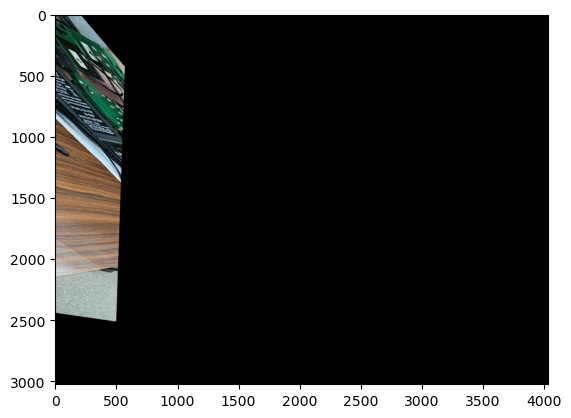

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('yahboom.jpg',1)

# 画像サイズの取得
imgInfo = img.shape
height = imgInfo[0]
width = imgInfo[1]

# 視点を設定
matSrc = np.float32([[200,100],[200,400],[0,3000],[width-1,height-1]]) # オリジナルの座標
matDst = np.float32([[200,100], [200,400], [500,2500], [width-2, height-2]]) # 変換後の座標

# 透視変換行列
matAffine = cv2.getPerspectiveTransform(matSrc, matDst)     # mat 1 src 2 dst

# 透視変換
dst = cv2.warpPerspective(img,matAffine,(width,height))

# 画像の表示
img_bgr2rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb)
plt.show()

In [15]:
#bgr8 to jpeg format
import enum
import cv2

def bgr8_to_jpeg(value, quality=75):
    return bytes(cv2.imencode('.jpg', value)[1])

TypeError: Image data of dtype |S3897088 cannot be converted to float

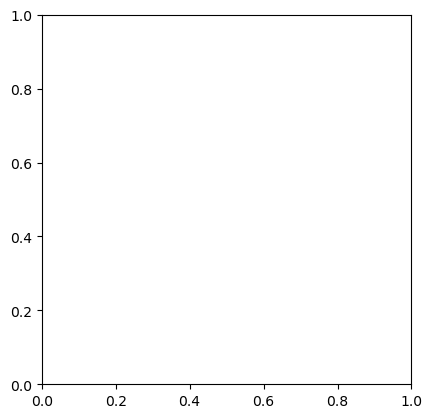

In [16]:
plt.imshow(bgr8_to_jpeg(img))
plt.show()

わかりやすい活かし方、画像

https://self-development.info/opencv%E3%81%AB%E3%82%88%E3%82%8B%E5%8F%B0%E5%BD%A2%E8%A3%9C%E6%AD%A3%E3%83%BB%E5%B0%84%E5%BD%B1%E5%A4%89%E6%8F%9B%E3%82%92%E8%A7%A3%E8%AA%AC%E3%80%90python%E3%80%91/

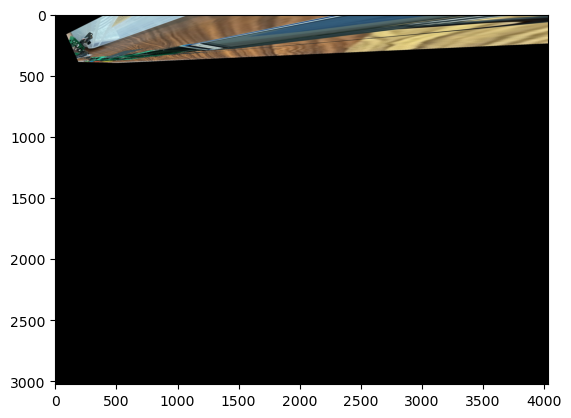

In [7]:
#src 4->dst 4 (Upper left corner, Lower left corner, Upper right corner)
matSrc = np.float32([[200,100],[200,400],[600,100],[width-1,height-1]])
matDst = np.float32([[200,200],[200,300],[500,100],[500,400]])
#Combine
matAffine = cv2.getPerspectiveTransform(matSrc,matDst)# mat 1 src 2 dst
dst = cv2.warpPerspective(img,matAffine,(width,height))
img_bgr2rgb = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_bgr2rgb)
plt.show()